In [12]:
#!/usr/bin/env python
# vim: set fileencoding=utf-8 :

__author__ = ' AUTOR: Miguel Cardenas-Montes'

''' RNN Bidireccional en Keras '''


"""Imports: librerias"""
import os
import math
from math import sqrt
import sys
import numpy
import numpy as np
import random
import scipy.stats
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from time import time

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM, GRU, Bidirectional

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import pandas as pd
from pandas import concat

import tensorflow as tf

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.dates as mdates

## Para cambiar las fuentes
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['axes.labelsize'] = 'large'

import matplotlib as mpl
np.set_printoptions(threshold=np.inf)

import pdb # Para depurar
import copy


##########################################
##############  Codigo  ##################
##########################################

"""Codigo principal"""

# Medians Rn222 HallA
mdnRnA=[90, 79, 99, 117, 99, 99, 86, 95, 93, 69, 87, 94, 74, 90, 76, 71, 87, 60, 72, 73, 77, 51, 66, 58, 63, 52.5, 67, 63, 78, 84, 69, 75, 77, 71, 82, 85, 82, 81.5, 94, 99, 97, 78, 93.5, 80, 92, 74, 71, 83, 70, 80, 86, 61, 77.6969111969112, 70, 83, 95, 82, 86, 83, 83, 82, 79, 101, 122, 100, 74, 70, 70, 70, 74, 73, 83, 66, 60, 66, 62, 60, 69, 67, 71, 68, 60, 68, 73, 66, 67, 72, 77, 67, 47, 68, 85.5, 84, 78, 89, 81, 61, 75, 99, 104, 83, 77.6969111969112, 62, 70, 91, 98, 103, 112, 105, 111, 109, 99, 110, 88, 82.5, 99, 81, 79, 72, 80, 75, 86, 77, 61, 56, 55, 66, 60, 71, 71, 74, 72, 54, 65, 74, 75, 76, 72, 69, 78.5, 67, 72, 63, 69, 87, 71, 71, 72.5, 75, 93, 89, 100, 96, 96, 101, 102, 70.5, 72, 74, 67, 68, 70, 65, 75.5, 72, 65, 80, 95, 94.5, 71, 84.5, 81, 78, 71, 66, 83, 85, 62, 73, 80, 69, 66, 63, 63, 69, 68, 78.5, 78, 78, 79, 67, 69, 82, 78, 61, 73.5, 70, 79, 81.5, 83, 90, 79, 99, 97, 95, 67, 79.5, 65, 80, 74, 70.5, 79, 78, 104, 77, 74, 87, 84, 94, 109, 91, 93.5, 95, 76, 72, 61, 57, 59, 70, 68, 82, 67, 69, 73, 76, 70, 57, 75, 63, 72, 64, 66, 70, 81, 68, 74, 72, 79, 84, 81, 69, 77, 74, 97, 103, 107, 88, 96, 101]

print(len(mdnRnA))


# New values
newValuesReal=[90, 106, 99, 104, 90, 80, 99, 105]# it starts first week of July 2018
print(len(newValuesReal)) 

259
8


In [14]:
# Normalizar datos (funcion de activacion tanh)
scaler = MinMaxScaler(feature_range=(-1, 1))
mdnRnA = np.array(mdnRnA).reshape(-1,1)
dataset = scaler.fit_transform(mdnRnA)
dataset

array([[ 0.14666667],
       [-0.14666667],
       [ 0.38666667],
       [ 0.86666667],
       [ 0.38666667],
       [ 0.38666667],
       [ 0.04      ],
       [ 0.28      ],
       [ 0.22666667],
       [-0.41333333],
       [ 0.06666667],
       [ 0.25333333],
       [-0.28      ],
       [ 0.14666667],
       [-0.22666667],
       [-0.36      ],
       [ 0.06666667],
       [-0.65333333],
       [-0.33333333],
       [-0.30666667],
       [-0.2       ],
       [-0.89333333],
       [-0.49333333],
       [-0.70666667],
       [-0.57333333],
       [-0.85333333],
       [-0.46666667],
       [-0.57333333],
       [-0.17333333],
       [-0.01333333],
       [-0.41333333],
       [-0.25333333],
       [-0.2       ],
       [-0.36      ],
       [-0.06666667],
       [ 0.01333333],
       [-0.06666667],
       [-0.08      ],
       [ 0.25333333],
       [ 0.38666667],
       [ 0.33333333],
       [-0.17333333],
       [ 0.24      ],
       [-0.12      ],
       [ 0.2       ],
       [-0

In [15]:
sample_size = 52 #52
dataset = np.asarray(dataset)
nepochs=5 #50
test_size = 52
assert 0 < sample_size < dataset.shape[0]

In [4]:
# dataframe (empty) creation
pdata_raw = pd.DataFrame({"0":np.arrbay(dataset.flatten())} )
pdata = pd.DataFrame()
names=list()
#print('pdata_raw 0',pdata_raw)
print('pdata 0',pdata)

pdata 0 Empty DataFrame
Columns: []
Index: []


In [ ]:
pdata_raw.values

In [5]:
# creating lagged data in columns
#nlags = 7 # number of lags,  number of ahead previsions is nlags+1
nlags= len(newValuesReal)-1 # write a comment
#ahead= nlags

for i in range(nlags, -1, -1):
    # Add the new lagged column at the end of the dataframe. In inverse order.
    pdata = pd.concat([pdata,pdata_raw.shift(i).reset_index(drop=True)], axis=1)
    names += str(i) # store this index for naming the columns of dataframe

In [24]:
pdata.head(7)

,0,1,2,3,4,5,6,7
0,0.146667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.146667,0.146667,NaN,NaN,NaN,NaN,NaN,NaN
2,0.386667,-0.146667,0.146667,NaN,NaN,NaN,NaN,NaN
3,0.866667,0.386667,-0.146667,0.146667,NaN,NaN,NaN,NaN
4,0.386667,0.866667,0.386667,-0.146667,0.146667,NaN,NaN,NaN
5,0.386667,0.386667,0.866667,0.386667,-0.146667,0.146667,NaN,NaN
6,0.040000,0.386667,0.386667,0.866667,0.386667,-0.146667,0.146667,NaN


In [27]:
# Add column names
#print(pdata)
print('names: ',names)
pdata.columns = names
#print(pdata)

# reversing the order of the columns
pdata = pdata[pdata.columns[::-1]]
print(pdata.head(7))

names:  ['7', '6', '5', '4', '3', '2', '1', '0']
    0         1         2         3         4         5         6         7
0 NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.146667
1 NaN       NaN       NaN       NaN       NaN       NaN  0.146667 -0.146667
2 NaN       NaN       NaN       NaN       NaN  0.146667 -0.146667  0.386667
3 NaN       NaN       NaN       NaN  0.146667 -0.146667  0.386667  0.866667
4 NaN       NaN       NaN  0.146667 -0.146667  0.386667  0.866667  0.386667
5 NaN       NaN  0.146667 -0.146667  0.386667  0.866667  0.386667  0.386667
6 NaN  0.146667 -0.146667  0.386667  0.866667  0.386667  0.386667  0.040000


In [29]:
dataset = np.asarray(pdata[nlags:])
print("dataset.shape",dataset.shape, pdata.shape)
dataset

dataset.shape (252, 8) (259, 8)


array([[ 0.14666667, -0.14666667,  0.38666667,  0.86666667,  0.38666667,
         0.38666667,  0.04      ,  0.28      ],
       [-0.14666667,  0.38666667,  0.86666667,  0.38666667,  0.38666667,
         0.04      ,  0.28      ,  0.22666667],
       [ 0.38666667,  0.86666667,  0.38666667,  0.38666667,  0.04      ,
         0.28      ,  0.22666667, -0.41333333],
       [ 0.86666667,  0.38666667,  0.38666667,  0.04      ,  0.28      ,
         0.22666667, -0.41333333,  0.06666667],
       [ 0.38666667,  0.38666667,  0.04      ,  0.28      ,  0.22666667,
        -0.41333333,  0.06666667,  0.25333333],
       [ 0.38666667,  0.04      ,  0.28      ,  0.22666667, -0.41333333,
         0.06666667,  0.25333333, -0.28      ],
       [ 0.04      ,  0.28      ,  0.22666667, -0.41333333,  0.06666667,
         0.25333333, -0.28      ,  0.14666667],
       [ 0.28      ,  0.22666667, -0.41333333,  0.06666667,  0.25333333,
        -0.28      ,  0.14666667, -0.22666667],
       [ 0.22666667, -0.41333333

In [30]:
## Creacion de las muestras a partir del array normalizado ##
X = np.atleast_3d(np.array([dataset[start:start + sample_size]
    for start in range(0, dataset.shape[0]-sample_size)]))
y = dataset[sample_size:]
qf = np.atleast_3d([dataset[-sample_size:]])

# Separamos en datos de entrenamiento y evaluacion

trainX, testX = X[:-test_size], X[-test_size:]
trainY, testY = y[:-test_size], y[-test_size:]

print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(148, 52, 8) (148, 8) (52, 52, 8) (52, 8)
(148, 52, 8) (148, 8) (52, 52, 8) (52, 8)


In [40]:
### Creamos la estructura de la RNN con LSTM's ###

# Neuronas en la primera y segunda capa ocultas, respectivamente
neurons = [52]

# Base del modelo
model = Sequential()

# Incorporamos una capa oculta de celulas LSTM
model.add(Bidirectional(LSTM(neurons[0], activation='tanh', return_sequences=True),
            input_shape=(X.shape[1],X.shape[2])))
print("model.output_shape",model.output_shape)

#model.add(Dropout(0.2))     # Dropout para evitar el sobreajuste

# Introducimos otra capa oculta de celulas LSTM
#model.add(Bidirectional(LSTM(neurons[1], activation='tanh', return_sequences=True)))
#model.add(Dropout(0.6))     # Dropout para evitar el sobreajuste

#model.add(Bidirectional(LSTM(neurons[2], activation='tanh')))
#model.add(Dropout(0.6))     # Dropout para evitar el sobreajuste

model.add(Flatten())

# Capa de salida con activacion lineal
model.add(Dense(104, activation='linear'))
model.add(Dense(X.shape[2], activation='linear'))

# Compilamos el modelo
model.compile(loss="mse", optimizer="rmsprop", metrics=['mse']) # previously optimizer=adam , o rmsprop

# Entrenamos la red con xx epocas
history = model.fit(trainX, trainY, epochs=nepochs, batch_size=10, validation_data=(testX, testY), verbose=2)

model.output_shape (None, 52, 104)
Train on 148 samples, validate on 52 samples
Epoch 1/5
 - 5s - loss: 0.3802 - mean_squared_error: 0.3802 - val_loss: 9149254.7885 - val_mean_squared_error: 9149254.7885
Epoch 2/5
 - 2s - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 9149403.5000 - val_mean_squared_error: 9149403.5000
Epoch 3/5
 - 3s - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 9149504.2885 - val_mean_squared_error: 9149504.2885
Epoch 4/5
 - 2s - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 9149238.5000 - val_mean_squared_error: 9149238.5000
Epoch 5/5
 - 2s - loss: 0.0393 - mean_squared_error: 0.0393 - val_loss: 9148912.5769 - val_mean_squared_error: 9148912.5769


In [41]:
### Pronostico de los datos de test ###
pred = model.predict(testX)
print(pred.shape)
print(pred[:,0].shape)

#
Xahead = np.atleast_3d(np.array([dataset[-sample_size:]] ))
print("Xahead.shape", Xahead.shape)

predahead = model.predict(Xahead)
print("preadahead", predahead)

(52, 8)
(52,)
Xahead.shape (1, 52, 8)
preadahead [[-0.14010866  0.17665516  0.45727512  0.62583244  0.3767459   0.11169951
   0.34225273  0.51377696]]


In [42]:
# Denormalizamos la informacion
pred = scaler.inverse_transform(pred)
testY = scaler.inverse_transform(testY)
predahead = scaler.inverse_transform(predahead)
predahead = np.squeeze(predahead)
print(predahead)

[ 79.245926  91.124565 101.64782  107.96872   98.627975  88.688736
  97.33448  103.76664 ]


2013-07-01 00:00:00 2017-06-19 00:00:00 2018-06-18 00:00:00


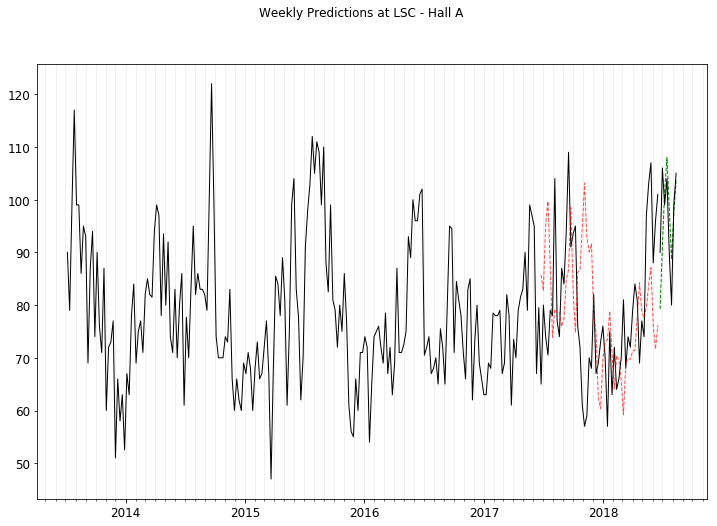

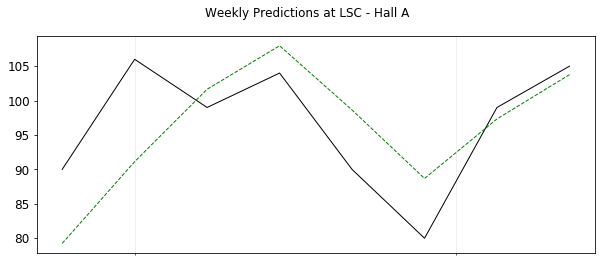

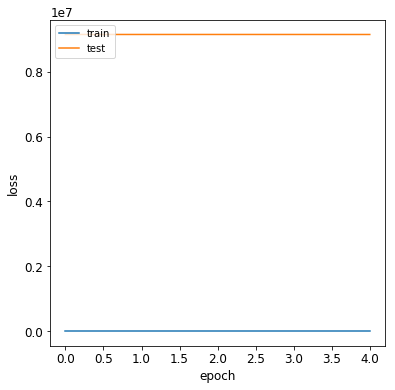

In [43]:
startday = pd.datetime(2013, 7, 1)
startdaypred = pd.datetime(2013, 7, 1) + 7*pd.Timedelta( len(mdnRnA)-len(pred), unit='D')
startdayahead = pd.datetime(2013, 7, 1) + 7*pd.Timedelta( len(mdnRnA), unit='D')
print(startday,startdaypred,startdayahead)

### Plotting ###
# general plot
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))#
plt.figure(1)
xaxis = ax.get_xaxis()
ax.xaxis.grid(b=True, which='minor', color='0.90', linewidth=0.6)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.plot(pd.date_range(startday, periods=len(mdnRnA), freq='W'), mdnRnA, linewidth=1,color='k')
ax.plot(pd.date_range(startdaypred, periods=len(pred[:,0]), freq='W'), pred[:,0], linewidth=1, alpha=0.7,
        linestyle='--',color='r')
ax.plot(pd.date_range(startdayahead, periods=len(predahead), freq='W'), predahead, linestyle='--', color='g', linewidth=1)

ax.plot(pd.date_range(startdayahead, periods=len(newValuesReal), freq='W'), newValuesReal, color='k', linewidth=1)

plt.suptitle('Weekly Predictions at LSC - Hall A')
plt.savefig('./prediction_BRNN_weekly_blockahead7_BRNN52_D104_D1_e50_b10_ss52_ts52.eps')

# ahead plot
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))#
plt.figure(2)
xaxis = ax.get_xaxis()
ax.xaxis.grid(b=True, which='minor', color='0.90', linewidth=0.6)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.plot(pd.date_range(startdayahead, periods=len(newValuesReal), freq='W'), newValuesReal, color='k', linewidth=1)
ax.plot(pd.date_range(startdayahead, periods=len(predahead), freq='W'), predahead, linestyle='--', color='g', linewidth=1)


plt.suptitle('Weekly Predictions at LSC - Hall A')
plt.savefig('./detailedprediction_BRNN_weekly_blockahead7_BRNN52_D104_D1_e50_b10_ss52_ts52.eps')

# summarize history for loss
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))# 6,6
plt.figure(3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#ax.set_yscale("log")
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('./loss_BRNN_weekly_blockahead7_BRNN52_D104_D1_e25_b10_ss52_ts52.eps')
